In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from tqdm.notebook import tqdm
import os


start_date = "2022-01-01"
end_date = "2022-06-01"

## Defense
RTX - Raytheon Technologies Corp.\
LMT - Lockheed Martin Corp.\
BA  - Boeing Co.\
NOC - Northrop Grumman Corp.\
GD - General Dynamics Corp.

## Airlines
LUV - Southwest Airlines\
DAL - Delta Air Lines\
UAL - United Airlines\
AAL - American Airlines

## Commodities
CL=F - Crude Oil June 22 Futures Contract

## Market Indexes
GSPC - S&P 500\
DJI - Dow Jones Industrial Average\
IXIC - NASDAQ Composite

https://www.ishares.com/us/products/239502/ishares-us-aerospace-defense-etf


In [2]:
defense_ticks = ["RTX", "LMT", "BA", "NOC", "GD"]
airline_ticks = ["LUV", "DAL", "UAL", "AAL"]
market_ticks = ["^GSPC", "^DJI", "^IXIC"]
market_labels = ["S&P 500", "DJIA", "NASDAQ Comp."]
commodities_ticks = ["CL=F"]
commodities_labels = ["Crude - June"]

In [3]:
def normalize_price(df):
    min_p = df.min()
    max_p = df.max()
    x = df
    y = (x - min_p) / (max_p - min_p)
    return y

def get_data(ticker_str_list, start_date, end_date):
    tickers = [yf.Ticker(name) for name in ticker_str_list]
    securities = [ticker.history(start = start_date, end = end_date) for ticker in tickers]
    opens = [normalize_price(securs["Open"]) for securs in securities]
    closes = [normalize_price(securs["Close"]) for securs in securities]
    highs = [normalize_price(securs["High"]) for securs in securities]
    lows = [normalize_price(securs["Low"]) for securs in securities]
    volumes = [normalize_price(securs["Volume"]) for securs in securities]

    return opens, closes, highs, lows, volumes

def get_single_data(ticker_str):#, start_date = "2000-01-01", end_date = "2022-05-01"):
    ticker = yf.Ticker(ticker_str)
    df = ticker.history(start = start_date, end = end_date)
    
    return(df)

def get_unnormed_data(ticker_str_list):#, start_date = "2000-01-01", end_date = "2022-05-01"):
    tickers = [yf.Ticker(name) for name in ticker_str_list]
    securities = [ticker.history(start = start_date, end = end_date) for ticker in tickers]
    opens = [securs["Open"] for securs in securities]
    closes = [securs["Close"] for securs in securities]
    highs = [securs["High"] for securs in securities]
    lows = [securs["Low"] for securs in securities]
    volumes = [securs["Volume"] for securs in securities]

    return opens, closes, highs, lows, volumes

def get_mean(data):
    n = len(data[0])
    tot = data[0][0]
    for i in range(1,n):
        tot+= data[0][i]
    return tot/n

In [4]:
def get_unnormed_opens(ticker_str_list, start_date, end_date):
    tickers = [yf.Ticker(name) for name in ticker_str_list]
    securities = [ticker.history(start = start_date, end = end_date) for ticker in tickers]
    opens = [securs["Open"] for securs in securities]

    return opens

In [5]:
sap = pd.read_csv(r'Current-S&P-500.csv')
sap = sap.fillna(0)

In [6]:
'''
Grab all tickers from each GICS Sub-Industry and group them, along with a list of the GICS Sub-Indistry labels
'''

sub_ind_ticks = []
current_list = []
sub_ind_labels = []
csv_title = "GICS-Sub-Industries.csv"
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y")

with open(csv_title, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["Sub-Industry", "Ticker List", " ", "Updated on: {}".format(dt_string)])

    
    for index, row in sap.iterrows():
        if row["Shared GICS Sub-Ind."] == 0:
            current_list.append(row["Symbol"])
        else:
            current_list.append(row["Symbol"])
            sub_ind_ticks.append(current_list)
            sub_ind_labels.append(row["Shared GICS Sub-Ind."])
            writer.writerow([row["Shared GICS Sub-Ind."], current_list])
            current_list = []
        
'''
Index 69 -> Aero & Defense
Index 71 -> Air Frieght & Logistics
Index 72 -> Airlines
''';

In [7]:
#beans_hol = dataframes

In [8]:
dataframes = []
for sub_industry, label in tqdm(zip(sub_ind_ticks, sub_ind_labels)):
    new_frame = pd.DataFrame()
    for entity in sub_industry:
        new_frame[entity] = get_unnormed_opens([entity], start_date, end_date)[0]
    dataframes.append(new_frame)

In [9]:
dataframes_w_avg = []
for subindustry in dataframes:
    hold = pd.DataFrame()
    hold["Normed Mean"] = normalize_price(subindustry).mean(axis=1)
    hold["Mean"] = subindustry.mean(axis=1)
    dataframes_w_avg.append(pd.concat([subindustry, hold], axis = 1))

In [10]:
dataframes_w_avg[69]

,BA,GD,HWM,HII,LHX,LMT,NOC,RTX,TDY,TXT,TDG,Normed Mean,Mean
Date,,,,,,,,,,,,,
2022-01-03,204.000000,206.738817,31.962881,184.551145,212.534351,350.065692,383.987450,85.095672,437.500000,77.497863,638.919983,0.340260,255.713987
2022-01-04,211.300003,206.808059,32.652078,185.381104,211.996708,350.904630,384.572931,86.865200,443.390015,77.018000,650.000000,0.374440,258.262612
2022-01-05,216.639999,210.468029,33.770782,187.584360,213.470232,358.277440,388.046141,89.168554,448.839996,78.227652,646.390015,0.435223,260.989382
2022-01-06,214.639999,210.230619,33.740812,186.408631,209.139305,355.316479,394.516182,89.366267,430.779999,77.147960,653.500000,0.410577,259.526023
2022-01-07,212.979996,210.270197,33.740814,189.471478,217.412875,354.408444,395.270411,89.227873,425.269989,77.018000,651.280029,0.419361,259.668191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-24,122.440002,216.190002,34.060001,200.147598,233.630005,430.309130,453.893837,91.199997,391.329987,63.889999,573.380005,0.367004,255.497324
2022-05-25,119.169998,219.779999,33.459999,203.339204,238.630005,440.723992,469.396274,93.320000,389.519989,62.959999,578.739990,0.402950,259.003586
2022-05-26,123.099998,221.729996,34.430000,206.509995,238.210007,447.203482,468.987786,94.519997,390.010010,63.270000,597.500000,0.451529,262.315570


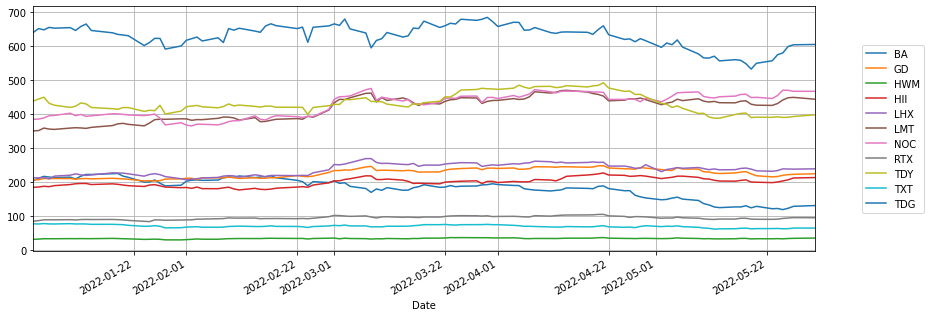

In [11]:
ax1 = dataframes[69].plot(figsize = (14,5))
ax1.legend(loc = "center", bbox_to_anchor = (1.1,0.5));
ax1.grid()

ax1.set_xlim(dataframes[69].index[0], dataframes[69].index[-1]);

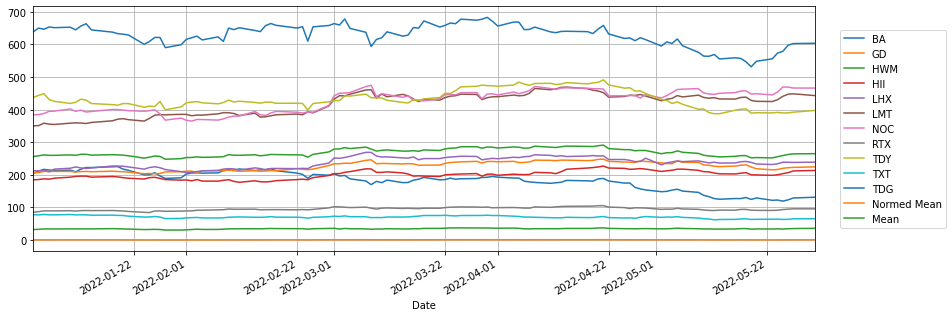

In [12]:
ax1 = dataframes_w_avg[69].plot(figsize = (14,5))
ax1.legend(loc = "center", bbox_to_anchor = (1.1,0.5));
ax1.grid()

ax1.set_xlim(dataframes[69].index[0], dataframes[69].index[-1]);

In [13]:
correlation_ticks = ["CL=F"]
correlation_from = "Crude"
corrdata = get_unnormed_opens(correlation_ticks, start_date, end_date)[0]
corrdata = corrdata[0:-1]
corrdata

Date
2022-01-03     75.690002
2022-01-04     76.019997
2022-01-05     77.180000
2022-01-06     77.239998
2022-01-07     79.620003
                 ...    
2022-05-24    110.410004
2022-05-25    110.389999
2022-05-26    110.690002
2022-05-27    114.199997
2022-05-31    114.959999
Name: Open, Length: 103, dtype: float64

In [14]:
corrdata = normalize_price(corrdata)
corrdata

Date
2022-01-03    0.000000
2022-01-04    0.006739
2022-01-05    0.030427
2022-01-06    0.031652
2022-01-07    0.080253
                ...   
2022-05-24    0.709006
2022-05-25    0.708597
2022-05-26    0.714723
2022-05-27    0.786400
2022-05-31    0.801919
Name: Open, Length: 103, dtype: float64

In [15]:
correlations = [corrdata.corr(dataframes_w_avg[x]["Mean"]) for x in range(len(dataframes_w_avg))]
normed_correlations = [corrdata.corr(dataframes_w_avg[x]["Normed Mean"]) for x in range(len(dataframes_w_avg))]

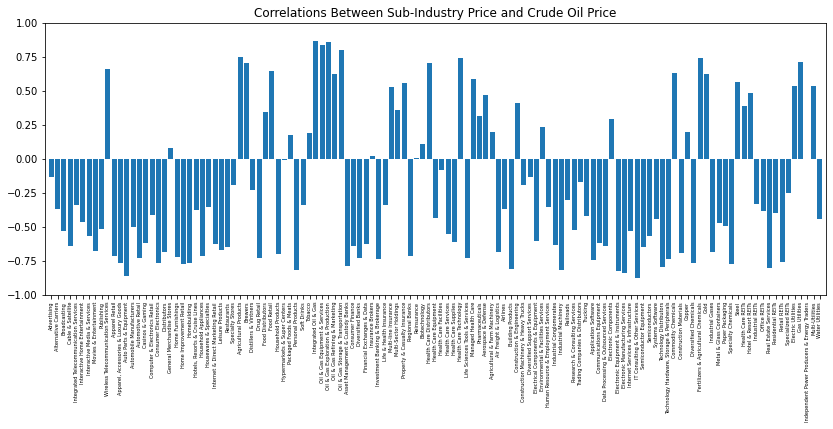

In [16]:
fig, ax1 = plt.subplots(figsize = (14, 5))
ax1.bar(sub_ind_labels, correlations)
ax1.set_xticks(ax1.get_xticks());
ax1.set_xticklabels(sub_ind_labels, rotation = 90, fontsize = 5);
ax1.set_xlim(-1, 123);
#ax1.fill_betweenx([-1.5,1.5], -1,26, color = "red", alpha = 0.5)
#ax1.fill_betweenx([-1.5,1.5], 86,119, color = "red", alpha = 0.5)
ax1.set_ylim(-1.0,1.0)
ax1.set_title("Correlations Between Sub-Industry Price and Crude Oil Price")
fig.savefig("plots/Correlation_Bar_Chart", dpi = 300, facecolor = 'white', bbox_inches='tight')

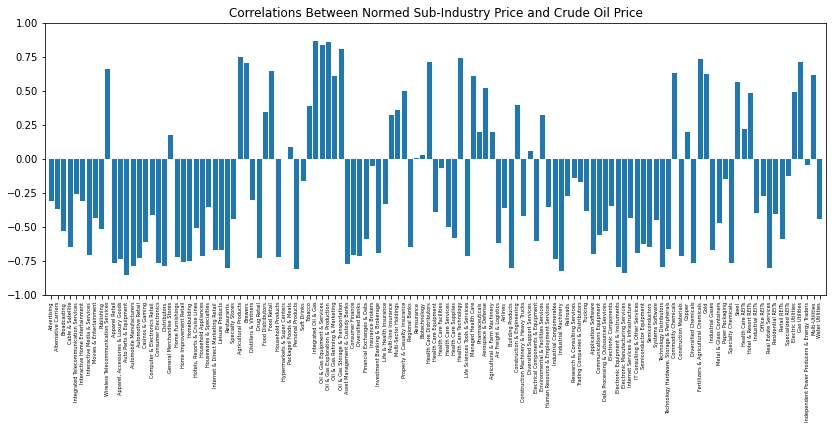

In [17]:
fig, ax1 = plt.subplots(figsize = (14, 5))
ax1.bar(sub_ind_labels, normed_correlations)
ax1.set_xticks(ax1.get_xticks());
ax1.set_xticklabels(sub_ind_labels, rotation = 90, fontsize = 5);
ax1.set_xlim(-1, 123);
#ax1.fill_betweenx([-1.5,1.5], -1,26, color = "red", alpha = 0.5)
#ax1.fill_betweenx([-1.5,1.5], 86,119, color = "red", alpha = 0.5)
ax1.set_ylim(-1.0,1.0)
ax1.set_title("Correlations Between Normed Sub-Industry Price and Crude Oil Price")
fig.savefig("plots/Normed_Correlation_Bar_Chart", dpi = 300, facecolor = 'white', bbox_inches='tight')

In [18]:
corr_df = {"Subindustry":sub_ind_labels, "Correlation":correlations}
corr_df = pd.DataFrame(corr_df)
corr_df = corr_df.sort_values("Correlation", ascending = False)

normed_corr_df = {"Subindustry":sub_ind_labels, "Correlation":normed_correlations}
normed_corr_df = pd.DataFrame(normed_corr_df)
normed_corr_df = normed_corr_df.sort_values("Correlation", ascending = False)

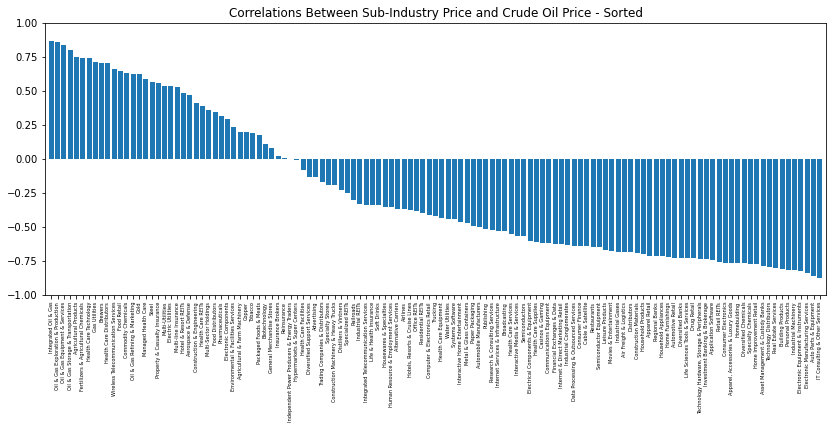

In [19]:
fig, ax1 = plt.subplots(figsize = (14, 5))
ax1.bar(corr_df["Subindustry"], corr_df["Correlation"])
ax1.set_xticks(ax1.get_xticks());
ax1.set_xticklabels(corr_df["Subindustry"], rotation = 90, fontsize = 5);
ax1.set_xlim(-1, 123);
ax1.set_title("Correlations Between Sub-Industry Price and Crude Oil Price - Sorted")
ax1.set_ylim(-1.0,1.0)
fig.savefig("plots/Sorted_Correlation_Bar_Chart", dpi = 300, facecolor = 'white', bbox_inches='tight')

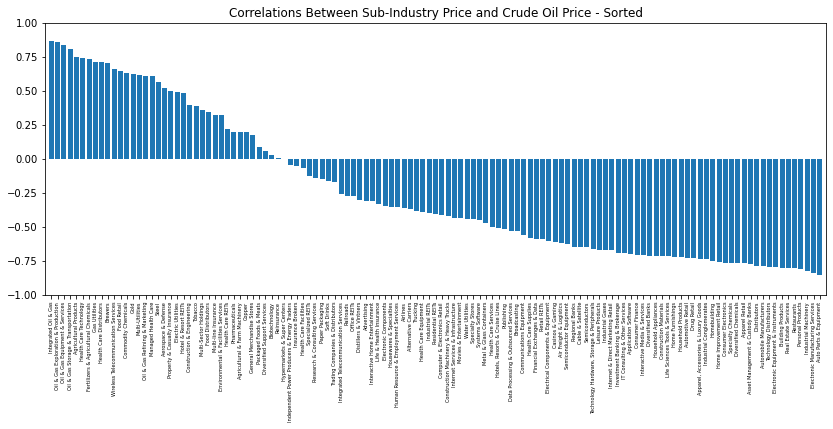

In [20]:
fig, ax1 = plt.subplots(figsize = (14, 5))
ax1.bar(normed_corr_df["Subindustry"], normed_corr_df["Correlation"])
ax1.set_xticks(ax1.get_xticks());
ax1.set_xticklabels(normed_corr_df["Subindustry"], rotation = 90, fontsize = 5);
ax1.set_xlim(-1, 123);
ax1.set_title("Correlations Between Sub-Industry Price and Crude Oil Price - Sorted")
ax1.set_ylim(-1.0,1.0)
fig.savefig("plots/Sorted_Normed_Correlation_Bar_Chart", dpi = 300, facecolor = 'white', bbox_inches='tight')

In [21]:
from tqdm.notebook import tqdm
import os
import imageio

filenames = []
step = 5
for i in range(10):
    if i % 2 == 0:
        for j in range(step):
            filenames.append("plots/Sorted_Normed_Correlation_Bar_Chart.png")
    else:
        for j in range(step):
            filenames.append("plots/Sorted_Correlation_Bar_Chart.png")
              

with imageio.get_writer('plots/Sorted_Correlation_Diff.gif', mode='I') as writer:
    for filename in tqdm(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)

In [64]:
from tqdm.notebook import tqdm
import os
import imageio

filenames = []
step = 5
for i in range(10):
    if i % 2 == 0:
        for j in range(step):
            filenames.append("plots/Normed_Correlation_Bar_Chart.png")
    else:
        for j in range(step):
            filenames.append("plots/Correlation_Bar_Chart.png")
              

with imageio.get_writer('plots/Correlation_Diff.gif', mode='I') as writer:
    for filename in tqdm(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)
        

FileNotFoundError: No such file: '/Users/andystrubhar/Aero_Finances/plots/Normed_Correlation_Bar_Chart.png'

In [23]:
#Change color based on change in value between normed and un-normed

In [24]:
print("Defense true: {} \nDefense normed: {}".format(corr_df["Correlation"][69],normed_corr_df["Correlation"][69]))
print("\nFreight true: {} \nFreight normed: {}".format(corr_df["Correlation"][71],normed_corr_df["Correlation"][71]))
print("\nAirlines true: {} \nAirlines normed: {}".format(corr_df["Correlation"][72],normed_corr_df["Correlation"][72]))

Defense true: 0.4731633014534511 
Defense normed: 0.5206836640833893

Freight true: -0.6861672932910826 
Freight normed: -0.6172408322959245

Airlines true: -0.36906947132024814 
Airlines normed: -0.36404758199348763


In [25]:
correlation_ticks = ["GC=F"]
correlation_from = "Gold"
corrdata = get_unnormed_opens(correlation_ticks, start_date, end_date)[0]
corrdata = corrdata[0:-1]
corrdata

Date
2022-01-03    1830.099976
2022-01-04    1800.500000
2022-01-05    1813.099976
2022-01-06    1787.099976
2022-01-07    1791.800049
                 ...     
2022-05-24    1852.500000
2022-05-25    1846.199951
2022-05-26    1840.400024
2022-05-27    1848.300049
2022-05-31    1850.300049
Name: Open, Length: 103, dtype: float64

In [26]:
corrdata = normalize_price(corrdata)
corrdata

Date
2022-01-03    0.161351
2022-01-04    0.050281
2022-01-05    0.097561
2022-01-06    0.000000
2022-01-07    0.017636
                ...   
2022-05-24    0.245403
2022-05-25    0.221763
2022-05-26    0.200000
2022-05-27    0.229644
2022-05-31    0.237148
Name: Open, Length: 103, dtype: float64

In [27]:
correlations = [corrdata.corr(dataframes_w_avg[x]["Mean"]) for x in range(len(dataframes_w_avg))]
normed_correlations = [corrdata.corr(dataframes_w_avg[x]["Normed Mean"]) for x in range(len(dataframes_w_avg))]

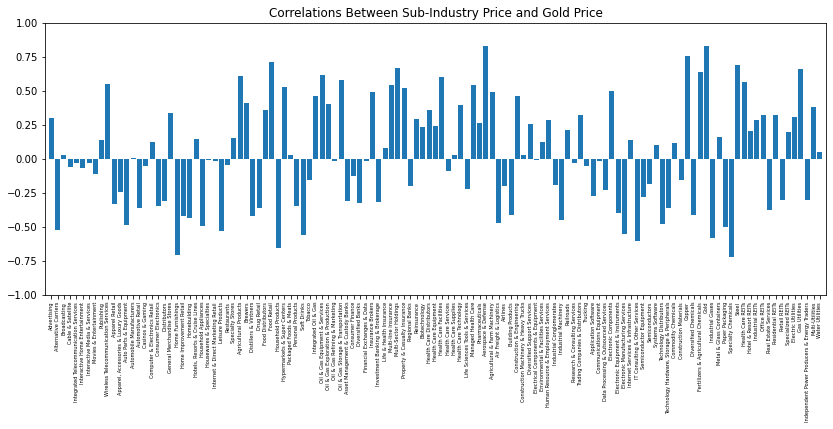

In [28]:
fig, ax1 = plt.subplots(figsize = (14, 5))
ax1.bar(sub_ind_labels, correlations)
ax1.set_xticks(ax1.get_xticks());
ax1.set_xticklabels(sub_ind_labels, rotation = 90, fontsize = 5);
ax1.set_xlim(-1, 123);
#ax1.fill_betweenx([-1.5,1.5], -1,26, color = "red", alpha = 0.5)
#ax1.fill_betweenx([-1.5,1.5], 86,119, color = "red", alpha = 0.5)
ax1.set_ylim(-1.0,1.0)
ax1.set_title("Correlations Between Sub-Industry Price and Gold Price")
fig.savefig("plots/Gold_Correlation_Bar_Chart", dpi = 300, facecolor = 'white', bbox_inches='tight')

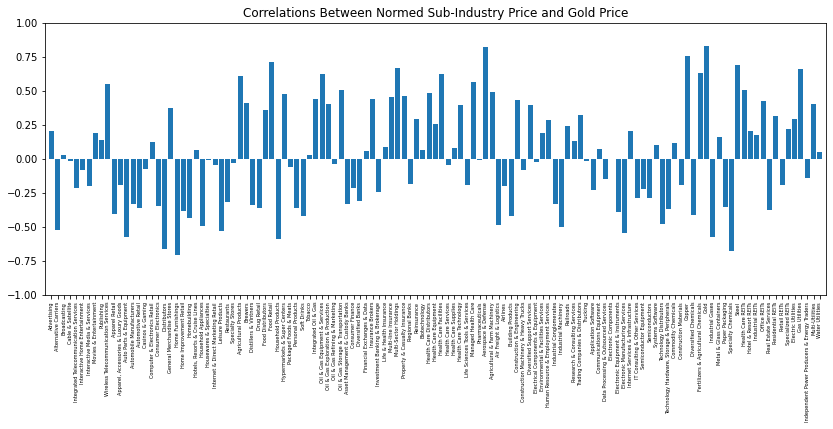

In [29]:
fig, ax1 = plt.subplots(figsize = (14, 5))
ax1.bar(sub_ind_labels, normed_correlations)
ax1.set_xticks(ax1.get_xticks());
ax1.set_xticklabels(sub_ind_labels, rotation = 90, fontsize = 5);
ax1.set_xlim(-1, 123);
#ax1.fill_betweenx([-1.5,1.5], -1,26, color = "red", alpha = 0.5)
#ax1.fill_betweenx([-1.5,1.5], 86,119, color = "red", alpha = 0.5)
ax1.set_ylim(-1.0,1.0)
ax1.set_title("Correlations Between Normed Sub-Industry Price and Gold Price")
fig.savefig("plots/Gold_Normed_Correlation_Bar_Chart", dpi = 300, facecolor = 'white', bbox_inches='tight')

In [30]:
corr_df = {"Subindustry":sub_ind_labels, "Correlation":correlations}
corr_df = pd.DataFrame(corr_df)
corr_df = corr_df.sort_values("Correlation", ascending = False)

normed_corr_df = {"Subindustry":sub_ind_labels, "Correlation":normed_correlations}
normed_corr_df = pd.DataFrame(normed_corr_df)
normed_corr_df = normed_corr_df.sort_values("Correlation", ascending = False)

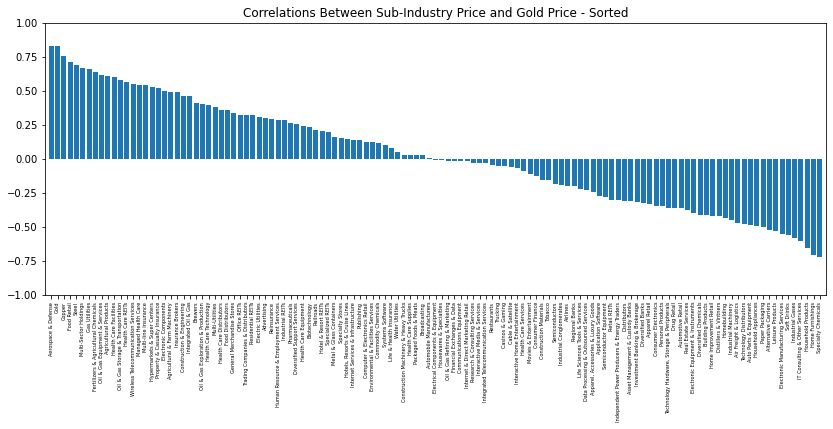

In [31]:
fig, ax1 = plt.subplots(figsize = (14, 5))
ax1.bar(corr_df["Subindustry"], corr_df["Correlation"])
ax1.set_xticks(ax1.get_xticks());
ax1.set_xticklabels(corr_df["Subindustry"], rotation = 90, fontsize = 5);
ax1.set_xlim(-1, 123);
ax1.set_title("Correlations Between Sub-Industry Price and Gold Price - Sorted")
ax1.set_ylim(-1.0,1.0)
fig.savefig("plots/Gold_Sorted_Correlation_Bar_Chart", dpi = 300, facecolor = 'white', bbox_inches='tight')

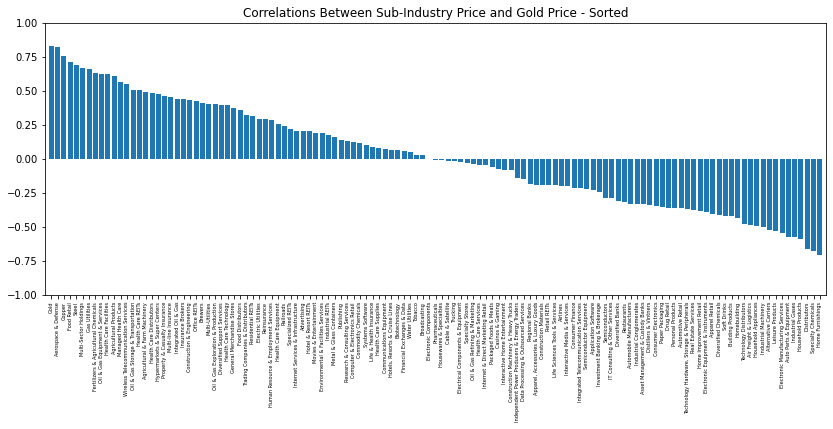

In [32]:
fig, ax1 = plt.subplots(figsize = (14, 5))
ax1.bar(normed_corr_df["Subindustry"], normed_corr_df["Correlation"])
ax1.set_xticks(ax1.get_xticks());
ax1.set_xticklabels(normed_corr_df["Subindustry"], rotation = 90, fontsize = 5);
ax1.set_xlim(-1, 123);
ax1.set_title("Correlations Between Sub-Industry Price and Gold Price - Sorted")
ax1.set_ylim(-1.0,1.0)
fig.savefig("plots/Gold_Sorted_Normed_Correlation_Bar_Chart", dpi = 300, facecolor = 'white', bbox_inches='tight')

In [33]:
filenames = []
step = 5
for i in range(10):
    if i % 2 == 0:
        for j in range(step):
            filenames.append("plots/Gold_Sorted_Normed_Correlation_Bar_Chart.png")
    else:
        for j in range(step):
            filenames.append("plots/Gold_Sorted_Correlation_Bar_Chart.png")
              

with imageio.get_writer('plots/Gold_Sorted_Correlation_Diff.gif', mode='I') as writer:
    for filename in tqdm(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)

In [34]:
filenames = []
step = 5
for i in range(10):
    if i % 2 == 0:
        for j in range(step):
            filenames.append("plots/Gold_Normed_Correlation_Bar_Chart.png")
    else:
        for j in range(step):
            filenames.append("plots/Gold_Correlation_Bar_Chart.png")
              

with imageio.get_writer('plots/Gold_Correlation_Diff.gif', mode='I') as writer:
    for filename in tqdm(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)
        

In [35]:
#Change color based on change in value between normed and un-normed

In [36]:
print("Defense true: {} \nDefense normed: {}".format(corr_df["Correlation"][69],normed_corr_df["Correlation"][69]))
print("\nFreight true: {} \nFreight normed: {}".format(corr_df["Correlation"][71],normed_corr_df["Correlation"][71]))
print("\nAirlines true: {} \nAirlines normed: {}".format(corr_df["Correlation"][72],normed_corr_df["Correlation"][72]))

Defense true: 0.8334799487699367 
Defense normed: 0.8203812828898073

Freight true: -0.4717574536190472 
Freight normed: -0.4867971459392706

Airlines true: -0.19759121854130315 
Airlines normed: -0.1996860667771368


In [37]:
corrdata

Date
2022-01-03    0.161351
2022-01-04    0.050281
2022-01-05    0.097561
2022-01-06    0.000000
2022-01-07    0.017636
                ...   
2022-05-24    0.245403
2022-05-25    0.221763
2022-05-26    0.200000
2022-05-27    0.229644
2022-05-31    0.237148
Name: Open, Length: 103, dtype: float64

In [44]:
inflation = pd.read_csv('fredgraph.csv')
inflation = inflation.rename(columns={"CPIAUCSL_PC1": "CPI", "CPILFESL_PC1": "CPI Less F&E"})
inflation

,DATE,CPI,CPI Less F&E
0,1948-01-01,10.24209,.
1,1948-02-01,9.48196,.
2,1948-03-01,6.81818,.
3,1948-04-01,8.27273,.
4,1948-05-01,9.38497,.
...,...,...,...
887,2021-12-01,7.09654,5.47662
888,2022-01-01,7.52593,6.04078
889,2022-02-01,7.91202,6.41574
890,2022-03-01,8.55759,6.43604


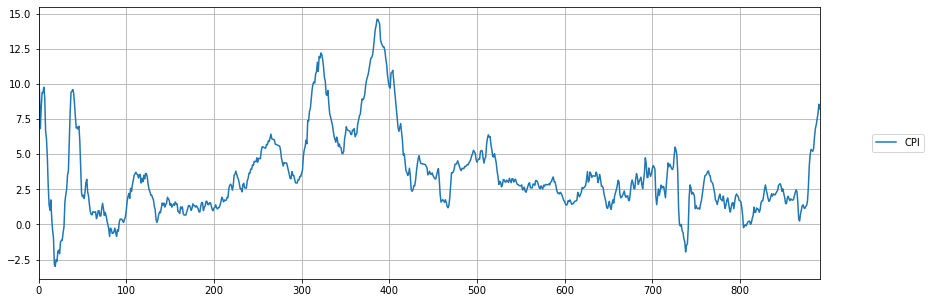

In [55]:
ax1 = inflation.plot(figsize = (14,5))
#ax1.plot(inflation["CPI Less F&E"])
ax1.legend(loc = "center", bbox_to_anchor = (1.1,0.5));
ax1.grid()

ax1.set_xlim(inflation.index[0], inflation.index[-1]);

In [63]:
inflation[864:]

,DATE,CPI,CPI Less F&E
864,2020-01-01,2.46049,2.25844
865,2020-02-01,2.31971,2.37576
866,2020-03-01,1.53064,2.11721
867,2020-04-01,0.36486,1.45558
868,2020-05-01,0.24244,1.25228
869,2020-06-01,0.72681,1.19531
870,2020-07-01,1.03283,1.54123
871,2020-08-01,1.32759,1.71390
872,2020-09-01,1.40065,1.72495
873,2020-10-01,1.18420,1.62743
